In [0]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import cifar10

# use Keras to import pre-shuffled cifar10 database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("The cifar10 database has a training set of %d examples." % len(X_train))
print("The cifar10 database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The cifar10 database has a training set of 50000 examples.
The cifar10 database has a test set of 10000 examples.


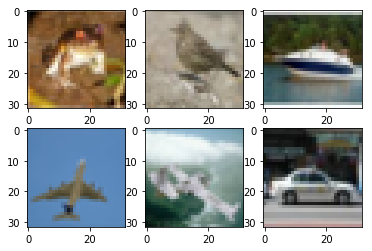

In [3]:
# Visualizing the images
plt.subplot(2,3,1)
plt.imshow(X_train[0])

plt.subplot(2,3,2)
plt.imshow(X_train[120])

plt.subplot(2,3,3)
plt.imshow(X_train[1300])

plt.subplot(2,3,4)
plt.imshow(X_train[3049])

plt.subplot(2,3,5)
plt.imshow(X_train[3644])

plt.subplot(2,3,6)
plt.imshow(X_train[5149])

In [0]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
# Creating the CNN model
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

classifier = Sequential()

# Convolutional Layers
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(p = 0.25))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(p = 0.25))

# Fully connected Layers
classifier.add(Flatten())
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(p = 0.5))
classifier.add(Dense(512,activation = "relu"))
classifier.add(Dropout(p = 0.4))
classifier.add(Dense(10,activation = "softmax"))

classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.25)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.5)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`


In [0]:
# Compiling the model
classifier.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [0]:
# Creating callbacsks
from keras.callbacks import ModelCheckpoint,EarlyStopping   

checkpointer = ModelCheckpoint(filepath='cifar10_augmented_weights.hdf5', save_best_only=True)
earlystopper = EarlyStopping(monitor = "val_acc", patience=5)

In [0]:
# Using real time data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

datagen.fit(X_train)

In [13]:
# fits the model on batches with real-time data augmentation:
classifier.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                         steps_per_epoch=len(X_train) / 32, epochs=40,
                         callbacks=[earlystopper,checkpointer],
                         validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
1563/1562 [==============================] - 44s 28ms/step - loss: 1.6979 - acc: 0.3652 - val_loss: 1.3351 - val_acc: 0.5104
Epoch 2/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.3771 - acc: 0.4999 - val_loss: 1.1874 - val_acc: 0.5743
Epoch 3/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.2509 - acc: 0.5521 - val_loss: 1.1271 - val_acc: 0.5991
Epoch 4/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.1786 - acc: 0.5819 - val_loss: 1.0647 - val_acc: 0.6288
Epoch 5/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.1237 - acc: 0.6030 - val_loss: 0.9791 - val_acc: 0.6477
Epoch 6/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.0829 - acc: 0.6170 - val_loss: 1.0197 - val_acc: 0.6503
Epoch 7/40
1563/1562 [==============================] - 42s 27ms/step - loss: 1.0554 - acc: 0.6293 - val_loss: 0.9942 - val_acc: 0.6534


In [14]:
# load the weights that yielded the best validation accuracy
classifier.load_weights('cifar10_augmented_weights.hdf5')

# evaluate test accuracy
score = classifier.evaluate(X_test, y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

10000/10000 [==============================] - 1s 134us/step
Test accuracy: 73.05%


**Thank You**